# Imports

In [1]:
from googlesearch import search
import urllib.request as url
from bs4 import BeautifulSoup
import re
import string
import pandas as pd
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
def show_wordcloud(qry):
    search_results = search(query=qry, tld='com', lang='en', num=10, start=0, stop=20, pause=2.0)
    urls = [s for s in search_results]
    
    print("Extracting the content from top 10 search results..")
    web_content_cleaned_all = []

    for u in list(range(10)):
        try:
            weburl = url.urlopen(urls[u])
            web_content = weburl.read()
            web_content_cleaned = BeautifulSoup(web_content, "html").text
            web_content_cleaned = [val.lower() for val in web_content_cleaned.split(' ') if val.isalpha() or val.isnumeric()]
            web_content_cleaned_all.extend(web_content_cleaned)
        except:
            next
            
    print("Processing the data..")
    lemmatizer = WordNetLemmatizer()
    qry_words = (
        qry.lower().split(' ') + 
        [lemmatizer.lemmatize(w) for w in qry.lower().split(' ')]
    )
    stop_words = (
        list(set(stopwords.words('english'))) + 
        qry_words + ['archived', 'original', 'retrieved']
    )
    web_content_cleaned_final = (
        [lemmatizer.lemmatize(word) for word in web_content_cleaned_all if word not in stop_words]
    )
    
    print("Generating Word Cloud..")
    text_final = ' '.join(web_content_cleaned_final)
    wordcloud = WordCloud(
        max_font_size=100, 
        max_words=100,
        background_color="white",
        random_state=0
    ).generate(text_final)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(qry+'\n',size=20)
    plt.axis("off")
    plt.show()
    print("Done!!")

In [3]:
## Fetching the search results for a Search Query (to be entered as user input) ##

qry = input("Enter search query: ")

Enter search query:  Data Science


Extracting the content from top 10 search results..
Processing the data..
Generating Word Cloud..


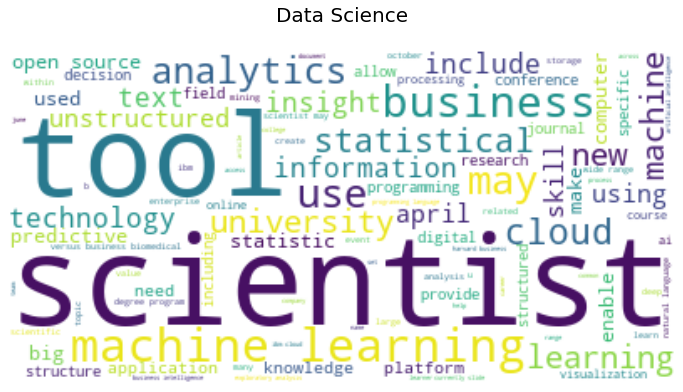

Done!!


In [4]:
show_wordcloud(qry)

Extracting the content from top 10 search results..
Processing the data..
Generating Word Cloud..


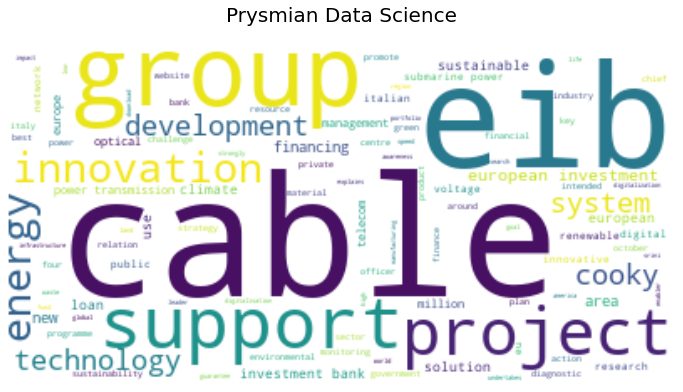

Done!!


In [5]:
show_wordcloud("Prysmian Data Science")

Extracting the content from top 10 search results..
Processing the data..
Generating Word Cloud..


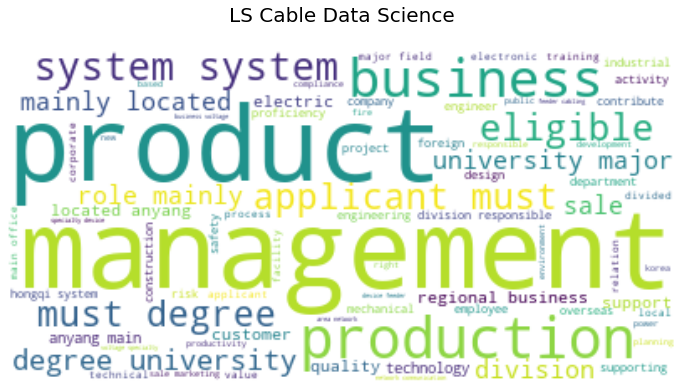

Done!!


In [6]:
show_wordcloud("LS Cable Data Science")

Extracting the content from top 10 search results..
Processing the data..
Generating Word Cloud..


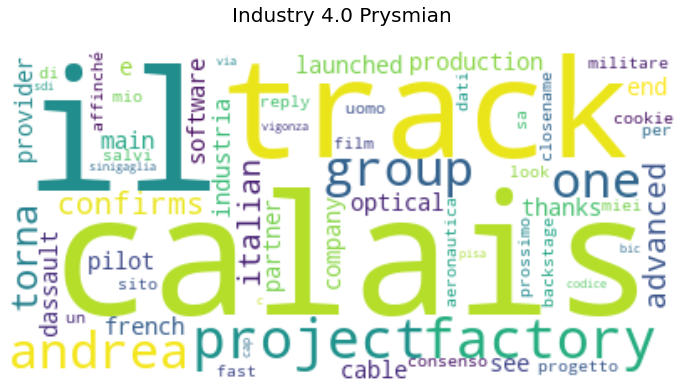

Done!!


In [7]:
show_wordcloud("Industry 4.0 Prysmian")

Extracting the content from top 10 search results..
Processing the data..
Generating Word Cloud..


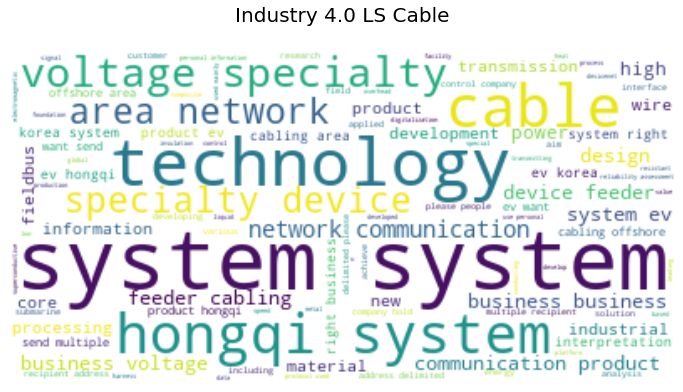

Done!!


In [8]:
show_wordcloud("Industry 4.0 LS Cable")